## Assignment 3 - Classification


Name: Aviv Yefet

ID: 208495267

### Import


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


### Load dataset - NMIST

In [3]:
# Importing the dataset

path = 'C:\\Users\\nbloc\\Desktop\\4Year\\ML\HW3\\'
file = 'mnist.csv'
nmist = pd.read_csv(path + file, header=None)

nmist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dependent and Independent variables

In [4]:
# Dependent variable: number between 0 to 9
y = nmist.loc[:,0] 

# Insependent variables: 784 pixel witch create image of the number (24X24)
X = nmist.loc[:,1:].to_numpy()

print(X.shape ,y.shape)
print(y)

(70000, 784) (70000,)
0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: 0, Length: 70000, dtype: int64


In [6]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: 0, dtype: int64

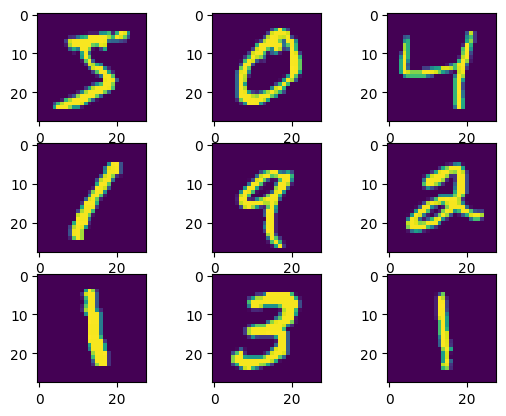

In [4]:
for i in range(9): 
    plt.subplot(3, 3, i+1)
    plt.imshow(X[i].reshape(28, 28))
plt.show()

## Classification models

Creating three classification models: Decision tree, Random forest and Logistic regression and reporting the models’ performance (accuracy, recall, precision, f1-score and AUC)


In [5]:
# Create df for each model:
# the df will contain the mean and standard deviation for each metric of each model


decision_tree_df = pd.DataFrame(columns = ['Metric','Mean','S.D'])
random_forest_df = pd.DataFrame(columns = ['Metric','Mean','S.D'])
ovo_logistic_df = pd.DataFrame(columns = ['Metric','Mean','S.D'])
ovr_logistic_df = pd.DataFrame(columns = ['Metric','Mean','S.D'])


### Decision Tree 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

tree_model = DecisionTreeClassifier(max_depth=15,random_state=0)
scoring = ('accuracy','precision_macro', 'recall_macro','f1_macro','roc_auc_ovr')

cv_scores = cross_validate(tree_model, X, y, cv = 10, scoring = scoring)  # Stratified K Fold

for score in scoring:
    score_test = 'test_'+ score
    score_mean = cv_scores[score_test].mean()
    score_sd = cv_scores[score_test].std()
    decision_tree_df = decision_tree_df.append({'Metric': score,'Mean': score_mean ,'S.D': score_sd}, ignore_index = True)
    

In [7]:
cv_scores

{'fit_time': array([15.96653605, 15.90548778, 15.89063573, 15.89731598, 15.9278903 ,
        15.92780399, 15.85235143, 15.9606638 , 15.96019626, 15.69474888]),
 'score_time': array([0.06042004, 0.06500506, 0.06203985, 0.05903721, 0.06000781,
        0.05900121, 0.06000686, 0.06196642, 0.05926394, 0.05899811]),
 'test_accuracy': array([0.881     , 0.87157143, 0.87257143, 0.87871429, 0.87285714,
        0.86871429, 0.87585714, 0.88128571, 0.87642857, 0.888     ]),
 'test_precision_macro': array([0.87978784, 0.87054273, 0.87149805, 0.87698217, 0.87123476,
        0.86687913, 0.87444283, 0.88011193, 0.87547697, 0.88651082]),
 'test_recall_macro': array([0.87955171, 0.86988434, 0.87099412, 0.87711906, 0.87117938,
        0.86702432, 0.87434199, 0.87967693, 0.87486849, 0.88624334]),
 'test_f1_macro': array([0.87960016, 0.86994333, 0.87104381, 0.87694891, 0.87116967,
        0.86671505, 0.8742181 , 0.87976317, 0.8750029 , 0.88620272]),
 'test_roc_auc_ovr': array([0.9185973 , 0.91419406, 0.911

In [8]:
decision_tree_df

,Metric,Mean,S.D
0,accuracy,0.876700,0.005422
1,precision_macro,0.875347,0.005450
2,recall_macro,0.875088,0.005425
3,f1_macro,0.875061,0.005461
4,roc_auc_ovr,0.916755,0.003715


### Random forest 

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=1,  max_depth=15)

scoring = ('accuracy','precision_macro', 'recall_macro','f1_macro','roc_auc_ovr')
cv_scores = cross_validate(rf_model, X, y, cv = 10, scoring = scoring) # Stratified K Fold
for score in scoring:
    score_test = 'test_'+ score
    score_mean = cv_scores[score_test].mean()
    score_sd = cv_scores[score_test].std()
    random_forest_df = random_forest_df.append({'Metric': score,'Mean': score_mean ,'S.D': score_sd}, ignore_index = True)
    

In [10]:
cv_scores

{'fit_time': array([41.93547702, 40.21617603, 40.66014576, 40.31367493, 40.5130651 ,
        40.37159586, 40.4578476 , 40.77128863, 41.47309566, 40.53136396]),
 'score_time': array([0.53608179, 0.54049706, 0.54315734, 0.53508615, 0.54133511,
        0.54145551, 0.53819633, 0.53679752, 0.53818774, 0.53772855]),
 'test_accuracy': array([0.96942857, 0.96185714, 0.96642857, 0.96314286, 0.96014286,
        0.96542857, 0.95842857, 0.966     , 0.96728571, 0.97242857]),
 'test_precision_macro': array([0.96943519, 0.96191508, 0.96627043, 0.96288338, 0.96013446,
        0.96516363, 0.95827578, 0.96581742, 0.96724998, 0.97212664]),
 'test_recall_macro': array([0.96935818, 0.96161062, 0.96616191, 0.96280234, 0.95989032,
        0.96524393, 0.95821832, 0.96556158, 0.96691756, 0.97214178]),
 'test_f1_macro': array([0.96937889, 0.96164903, 0.9661749 , 0.96282263, 0.95994538,
        0.96516351, 0.95821268, 0.96564829, 0.96705386, 0.97212354]),
 'test_roc_auc_ovr': array([0.99896886, 0.99853754, 0.998

In [11]:
 random_forest_df

,Metric,Mean,S.D
0,accuracy,0.965057,0.004041
1,precision_macro,0.964927,0.004008
2,recall_macro,0.964791,0.004042
3,f1_macro,0.964817,0.004040
4,roc_auc_ovr,0.998822,0.000219


### Logistic Regression

In [12]:
#  OneVsRest Classifier

from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier

ovr_logistic_model = OneVsRestClassifier(LogisticRegression(max_iter=100))

scoring = ('accuracy','precision_macro', 'recall_macro','f1_macro','roc_auc_ovr')
cv_scores = cross_validate(ovr_logistic_model, X, y, cv = 10, scoring = scoring) #Stratified K Fold

for score in scoring:
    score_test = 'test_'+ score
    score_mean = cv_scores[score_test].mean()
    score_sd = cv_scores[score_test].std()
    ovr_logistic_df = ovr_logistic_df.append({'Metric': score,'Mean': score_mean ,'S.D': score_sd}, ignore_index = True)

    

In [14]:
cv_scores

{'fit_time': array([73.38549662, 77.5005219 , 73.47324872, 70.77727675, 69.74697781,
        70.24443316, 72.82772827, 70.55205679, 68.85972738, 69.77379513]),
 'score_time': array([0.39213824, 0.48881578, 0.44461608, 0.36927176, 0.40272641,
        0.47095561, 0.39788508, 0.44420052, 0.39802456, 0.51430941]),
 'test_accuracy': array([0.921     , 0.90671429, 0.91685714, 0.91671429, 0.90514286,
        0.90742857, 0.905     , 0.91057143, 0.92085714, 0.92614286]),
 'test_precision_macro': array([0.9200229 , 0.90605449, 0.91617635, 0.9158006 , 0.90418323,
        0.90611699, 0.90396687, 0.90974888, 0.92045691, 0.92542318]),
 'test_recall_macro': array([0.91966002, 0.90523453, 0.91580807, 0.91534136, 0.90384509,
        0.90601594, 0.90368651, 0.90939846, 0.9194065 , 0.92481733]),
 'test_f1_macro': array([0.91969974, 0.90530972, 0.91593541, 0.91543716, 0.90389086,
        0.90601296, 0.90363122, 0.90932344, 0.91967996, 0.92489455]),
 'test_roc_auc_ovr': array([0.98970982, 0.98623145, 0.987

In [15]:
ovr_logistic_df

,Metric,Mean,S.D
0,accuracy,0.913643,0.007247
1,precision_macro,0.912795,0.007364
2,recall_macro,0.912321,0.007255
3,f1_macro,0.912382,0.007307
4,roc_auc_ovr,0.987935,0.001352


In [16]:
# OneVsOne Classifier
from sklearn.multiclass import OneVsOneClassifier

ovo_logistic_model = OneVsOneClassifier(LogisticRegression(max_iter=100))

scoring = ('accuracy','precision_macro', 'recall_macro','f1_macro')
cv_scores = cross_validate(ovo_logistic_model, X, y, cv = 10, scoring = scoring) #Stratified K Fold

for score in scoring:
    score_test = 'test_'+ score
    score_mean = cv_scores[score_test].mean()
    score_sd = cv_scores[score_test].std()
    ovo_logistic_df = ovo_logistic_df.append({'Metric': score,'Mean': score_mean ,'S.D': score_sd}, ignore_index = True)

    

In [17]:
cv_scores

{'fit_time': array([64.25615096, 64.63351274, 63.53310657, 68.19179964, 65.70891595,
        63.93925714, 66.22703004, 65.02676654, 68.8479054 , 66.39923358]),
 'score_time': array([1.61985159, 1.61324215, 1.63325477, 1.65680075, 1.63799405,
        1.6605525 , 1.67176795, 1.774261  , 1.67633533, 1.68071198]),
 'test_accuracy': array([0.92771429, 0.92528571, 0.923     , 0.92514286, 0.92085714,
        0.91671429, 0.919     , 0.92357143, 0.92971429, 0.93985714]),
 'test_precision_macro': array([0.9270421 , 0.92469011, 0.92261725, 0.92433237, 0.92024765,
        0.91613367, 0.91808341, 0.92253586, 0.92893222, 0.9391874 ]),
 'test_recall_macro': array([0.92684323, 0.92412637, 0.92179727, 0.9241163 , 0.91978486,
        0.91554674, 0.91774926, 0.92240335, 0.92844679, 0.93892602]),
 'test_f1_macro': array([0.92685096, 0.92428502, 0.92208436, 0.9241687 , 0.9198577 ,
        0.9156226 , 0.91783203, 0.92234996, 0.92859427, 0.93894028])}

In [18]:
ovo_logistic_df

,Metric,Mean,S.D
0,accuracy,0.925086,0.006150
1,precision_macro,0.924380,0.006151
2,recall_macro,0.923974,0.006216
3,f1_macro,0.924059,0.006199
